In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('tumor.csv')
labels = data['diagnosis']
data.drop(labels=['diagnosis', 'id', 'Unnamed: 32'], axis=1, inplace=True)
# data = (data - data.mean(axis=0))/data.std(axis=0)
pca = PCA(n_components=10)
data = pca.fit_transform(data)
data = pd.DataFrame(data)
data['diagnosis'] = labels
data['diagnosis'].replace(to_replace=['M','B'], value=[1,0], inplace=True)
labels = data['diagnosis']

In [3]:
def posterior(theta_hat_0, theta_hat, x):
    x = np.array(x)
    return np.array(1/(1+np.exp(-(theta_hat_0 + np.matmul(theta_hat, x.T)))))

In [4]:
def log_loss_func(theta_hat_0, theta_hat, x, y):
    x = np.array(x)
    y = np.array(y)
    
    p = posterior(theta_hat_0,theta_hat,x)
    
    log_p = np.array(pd.Series(np.log(p)).replace(to_replace=[np.inf,np.NINF],value=[0,0]))
    log_p_ = np.array(pd.Series(np.log(1-p)).replace(to_replace=[np.inf,np.NINF],value=[0,0]))
    
    lhs = np.matmul(y,log_p)
    rhs = np.matmul((1-y),log_p_)
    
    return -(lhs + rhs)

In [5]:
def derivative_theta_hat_0(theta_hat_0, theta_hat, x, y):
#     o_0 represents theta hat zero
    x = np.array(x)
    y = np.array(y)
    
    o_0 = ((y-1) * np.exp(theta_hat_0+np.matmul(theta_hat, x.T)) + y) / (np.exp(theta_hat_0+np.matmul(theta_hat, x.T)) + 1)
    
    o_0 = np.array(pd.Series(o_0).replace(to_replace=[np.nan],value=[0]))
    
    return np.sum(o_0)

In [6]:
def derivative_theta_hat(theta_hat_0, theta_hat, x, y):
#     o represents theta hat
    x = np.array(x)
    y = np.array(y)
    
    o = ((y-1) * np.exp(theta_hat_0+np.matmul(theta_hat, x.T)) + y) / (np.exp(theta_hat_0+np.matmul(theta_hat, x.T)) + 1)
    
    o = np.array(pd.Series(o).replace(to_replace=[np.nan],value=[0]))
    
    o = np.matmul(x.T, o)
    
    return o

In [7]:
values_log_loss = []

def fit():
    
    
    epoch_counter = 1
    X = np.array(data.iloc[:,:-1])
    Y = np.array(data['diagnosis'])
    theta_hat_0_initial = 1
    theta_hat_initial = np.array([1 for _ in range(10)])

    learning_rate = 10 ** (-5)

    error_tolerance = 10 ** (-5)
    while True:

        theta_hat_0_final = theta_hat_0_initial-(learning_rate*derivative_theta_hat_0(theta_hat_0_initial
                                                                                      ,theta_hat_initial,X,Y))

        theta_hat_final = theta_hat_initial-(learning_rate*derivative_theta_hat(theta_hat_0_initial
                                                                                ,theta_hat_initial,X,Y))

        log_loss_func_initial = log_loss_func(theta_hat_0_initial,theta_hat_initial,X,Y)
        log_loss_func_final = log_loss_func(theta_hat_0_final,theta_hat_final,X,Y)

        if abs(log_loss_func_initial - log_loss_func_final) < error_tolerance:
            print(f'Convergence has Acheived. Epoch = {epoch_counter}, Value of Log Loss Function = {log_loss_func_final}.\n')
            break
        
        print(f'Epoch = {epoch_counter}, Value of Log Loss Function = {log_loss_func_final}.\n')
        
        values_log_loss.append(log_loss_func_final)
        theta_hat_0_initial = theta_hat_0_final
        theta_hat_initial = theta_hat_final
        epoch_counter += 1
    
    return (theta_hat_0_final, theta_hat_final)

In [8]:
param = fit()

C:\Users\Manav\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
C:\Users\Manav\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
C:\Users\Manav\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Manav\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\Users\Manav\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Manav\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


Epoch = 1, Value of Log Loss Function = 8347.024283415494.

Epoch = 2, Value of Log Loss Function = 8812.49117942189.

Epoch = 3, Value of Log Loss Function = 9284.912356959658.

Epoch = 4, Value of Log Loss Function = 9760.665156053157.

Epoch = 5, Value of Log Loss Function = 9499.558283680504.

Epoch = 6, Value of Log Loss Function = 9153.33154070592.

Epoch = 7, Value of Log Loss Function = 9537.50629561943.

Epoch = 8, Value of Log Loss Function = 9207.492338113061.

Epoch = 9, Value of Log Loss Function = 9562.42663910212.

Epoch = 10, Value of Log Loss Function = 9918.185792318098.

Epoch = 11, Value of Log Loss Function = 10280.875531816557.

Epoch = 12, Value of Log Loss Function = 9204.521140190813.

Epoch = 13, Value of Log Loss Function = 9515.137168942225.

Epoch = 14, Value of Log Loss Function = 9825.837415859583.

Epoch = 15, Value of Log Loss Function = 10136.656349699799.

Epoch = 16, Value of Log Loss Function = 10447.665758858268.

Epoch = 17, Value of Log Loss Func

Epoch = 179, Value of Log Loss Function = 3964.9199329659764.

Epoch = 180, Value of Log Loss Function = 3983.647100670637.

Epoch = 181, Value of Log Loss Function = 4002.374787479281.

Epoch = 182, Value of Log Loss Function = 4021.102874439736.

Epoch = 183, Value of Log Loss Function = 3329.9578057295134.

Epoch = 184, Value of Log Loss Function = 2632.173964681217.

Epoch = 185, Value of Log Loss Function = 2643.4725174442187.

Epoch = 186, Value of Log Loss Function = 2654.771196486113.

Epoch = 187, Value of Log Loss Function = 2666.0699725968902.

Epoch = 188, Value of Log Loss Function = 2677.3688233167704.

Epoch = 189, Value of Log Loss Function = 1976.271728143981.

Epoch = 190, Value of Log Loss Function = 1984.5307388678077.

Epoch = 191, Value of Log Loss Function = 1992.7897850430209.

Epoch = 192, Value of Log Loss Function = 2001.0488584788934.

Epoch = 193, Value of Log Loss Function = 2009.1287771102827.

Epoch = 194, Value of Log Loss Function = 2017.2087129388246.

Epoch = 362, Value of Log Loss Function = 327.8255457073622.

Epoch = 363, Value of Log Loss Function = 328.85357263633193.

Epoch = 364, Value of Log Loss Function = 329.88159956530166.

Epoch = 365, Value of Log Loss Function = 330.9096264942714.

Epoch = 366, Value of Log Loss Function = 331.9376534232411.

Epoch = 367, Value of Log Loss Function = 332.9656803522109.

Epoch = 368, Value of Log Loss Function = 333.9937072811808.

Epoch = 369, Value of Log Loss Function = 335.02173421015044.

Epoch = 370, Value of Log Loss Function = 336.0497611391202.

Epoch = 371, Value of Log Loss Function = 337.07778806808994.

Epoch = 372, Value of Log Loss Function = 338.1058149970597.

Epoch = 373, Value of Log Loss Function = 339.13384192602933.

Epoch = 374, Value of Log Loss Function = 340.1618688549991.

Epoch = 375, Value of Log Loss Function = 341.1898957839689.

Epoch = 376, Value of Log Loss Function = 342.2179227129386.

Epoch = 377, Value of Log Loss Function = 343.24594964190845.

Ep

Epoch = 540, Value of Log Loss Function = 510.8143390639728.

Epoch = 541, Value of Log Loss Function = 511.8423659929426.

Epoch = 542, Value of Log Loss Function = 512.8703929219121.

Epoch = 543, Value of Log Loss Function = 513.8984198508816.

Epoch = 544, Value of Log Loss Function = 514.9264467798514.

Epoch = 545, Value of Log Loss Function = 515.954473708821.

Epoch = 546, Value of Log Loss Function = 516.9825006377907.

Epoch = 547, Value of Log Loss Function = 518.0105275667604.

Epoch = 548, Value of Log Loss Function = 519.0385544957301.

Epoch = 549, Value of Log Loss Function = 520.0665814246995.

Epoch = 550, Value of Log Loss Function = 521.0946083536693.

Epoch = 551, Value of Log Loss Function = 522.122635282639.

Epoch = 552, Value of Log Loss Function = 523.1506622116087.

Epoch = 553, Value of Log Loss Function = 524.1786891405782.

Epoch = 554, Value of Log Loss Function = 525.206716069548.

Epoch = 555, Value of Log Loss Function = 526.2347429985177.

Epoch = 556

Epoch = 718, Value of Log Loss Function = 694.8927537881714.

Epoch = 719, Value of Log Loss Function = 695.942145841996.

Epoch = 720, Value of Log Loss Function = 696.9915378958204.

Epoch = 721, Value of Log Loss Function = 698.0409299496453.

Epoch = 722, Value of Log Loss Function = 699.0903220034695.

Epoch = 723, Value of Log Loss Function = 700.1397140572943.

Epoch = 724, Value of Log Loss Function = 701.1891061111188.

Epoch = 725, Value of Log Loss Function = 702.238498164943.

Epoch = 726, Value of Log Loss Function = 703.2878902187679.

Epoch = 727, Value of Log Loss Function = 704.3372822725923.

Epoch = 728, Value of Log Loss Function = 705.386674326417.

Epoch = 729, Value of Log Loss Function = 706.4360663802415.

Epoch = 730, Value of Log Loss Function = 707.4854584340662.

Epoch = 731, Value of Log Loss Function = 708.5348504878907.

Epoch = 732, Value of Log Loss Function = 709.5842425417152.

Epoch = 733, Value of Log Loss Function = -0.0.

Convergence has Acheived

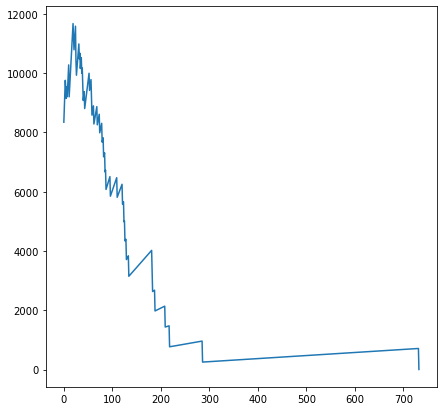

In [9]:
# Graph for values of log loss function
plt.figure(figsize=(7,7))
plt.plot(np.arange(len(values_log_loss)), values_log_loss)

In [10]:
param

(0.7364499107292954,
 array([47.25413662, 10.42047463,  1.09057236,  3.58447994,  0.93472581,
         0.83588505,  0.79796694,  1.04201711,  0.97381567,  1.01673317]))

In [11]:
posterior_probabilities = posterior(param[0], param[1], data.iloc[:,:-1])

C:\Users\Manav\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
TP = np.count_nonzero(((posterior_probabilities > 0.5) == True) & (data['diagnosis'] == 1))
TN = np.count_nonzero(((posterior_probabilities > 0.5) == False) & (data['diagnosis'] == 0))
FP = np.count_nonzero(((posterior_probabilities > 0.5) == True) & (data['diagnosis'] == 0))
FN = np.count_nonzero(((posterior_probabilities > 0.5) == False) & (data['diagnosis'] == 1))

In [13]:
accuracy = (TP + TN)/(TP + TN + FP + FN)
precision = TP/(TP + FP)
recall = TP/(TP + FN)

In [14]:
print(accuracy, precision, recall)

0.9068541300527241 0.9297297297297298 0.8113207547169812
